In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [3]:
rainfall_data = pd.read_csv('/content/Rainfall.csv')

In [4]:
print(rainfall_data.shape)

(366, 12)


In [5]:
rainfall_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
rainfall_data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
print(rainfall_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [8]:
rainfall_data.columns=rainfall_data.columns.str.strip()

In [9]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
rainfall_data = rainfall_data.drop(columns=["day"],axis=1)

In [11]:
rainfall_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [12]:
print(rainfall_data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [13]:
rainfall_data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [14]:
rainfall_data['winddirection']=rainfall_data['winddirection'].fillna(rainfall_data['winddirection'].mode()[0])

In [15]:
rainfall_data['windspeed']=rainfall_data['windspeed'].fillna(rainfall_data['windspeed'].median())

In [16]:
print(rainfall_data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [17]:
rainfall_data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
rainfall_data['rainfall']=rainfall_data['rainfall'].map({'yes':1,'no':0})

In [19]:
rainfall_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [20]:
sns.set(style="whitegrid")

In [21]:
rainfall_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [22]:
rainfall_data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

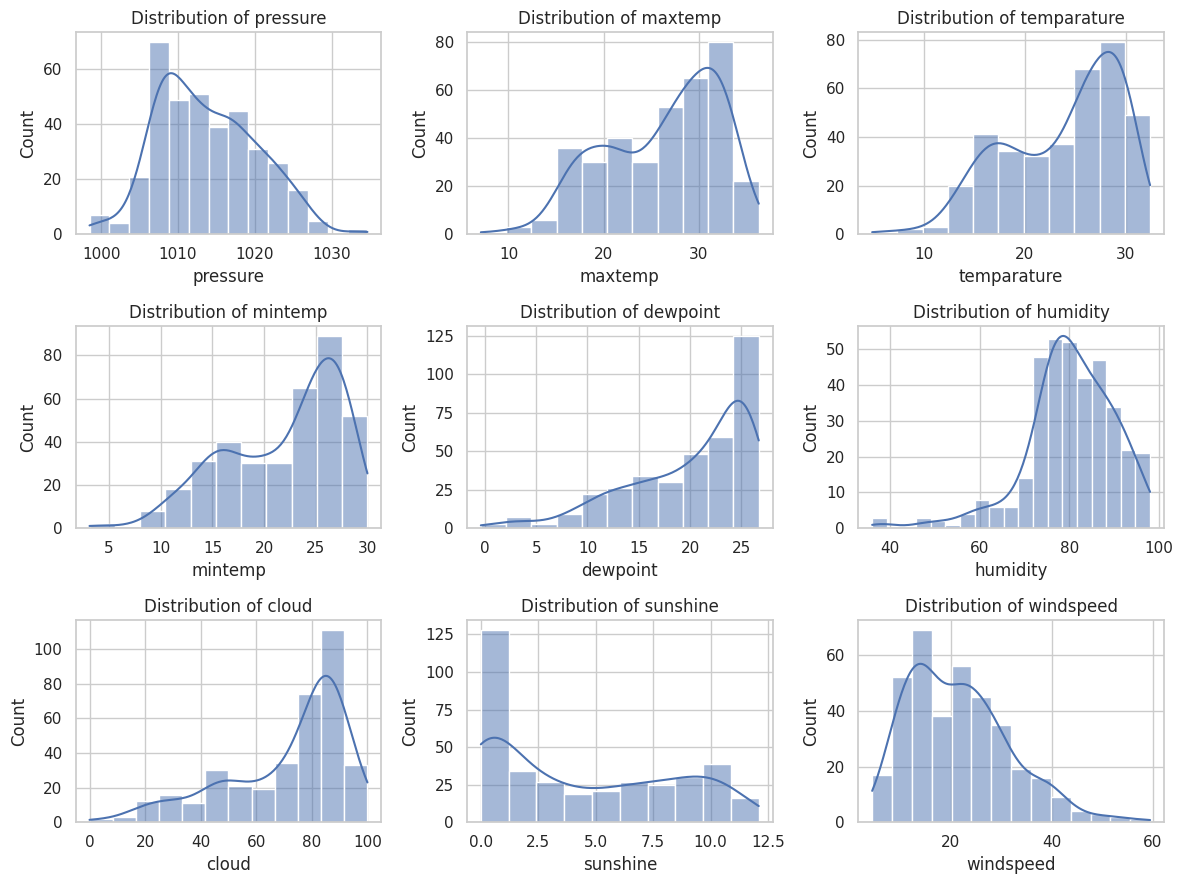

In [23]:
plt.figure(figsize=(12,9))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(rainfall_data[column],kde=True)
  plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

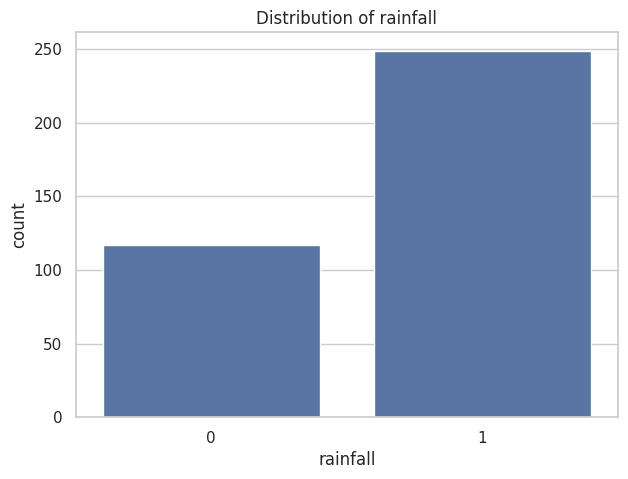

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x="rainfall",data=rainfall_data)
plt.title("Distribution of rainfall")
plt.show()

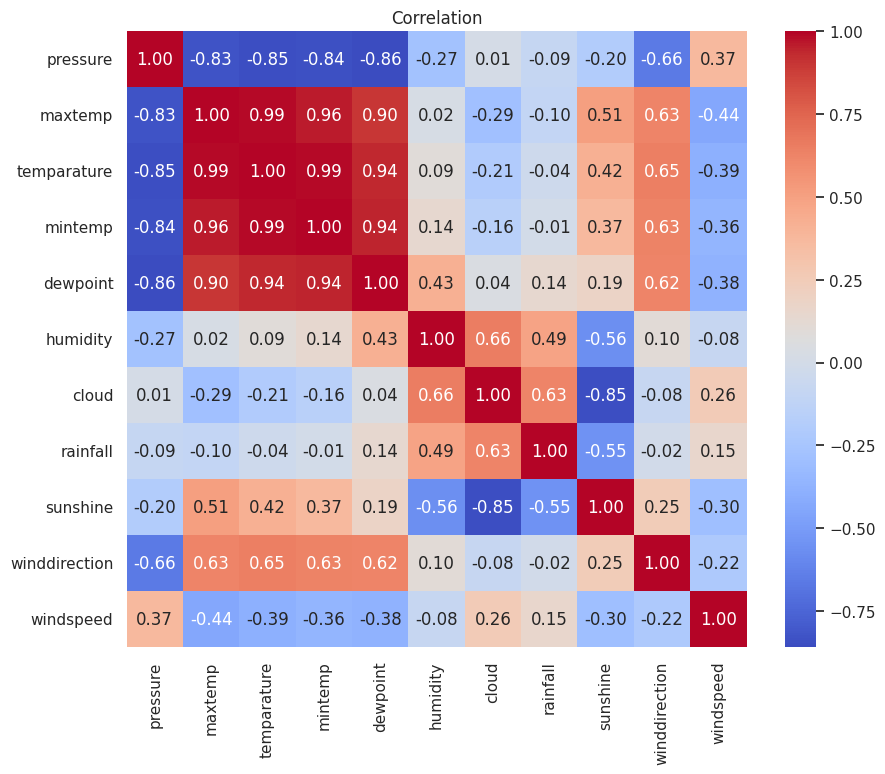

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(rainfall_data.corr(),cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation")
plt.show()

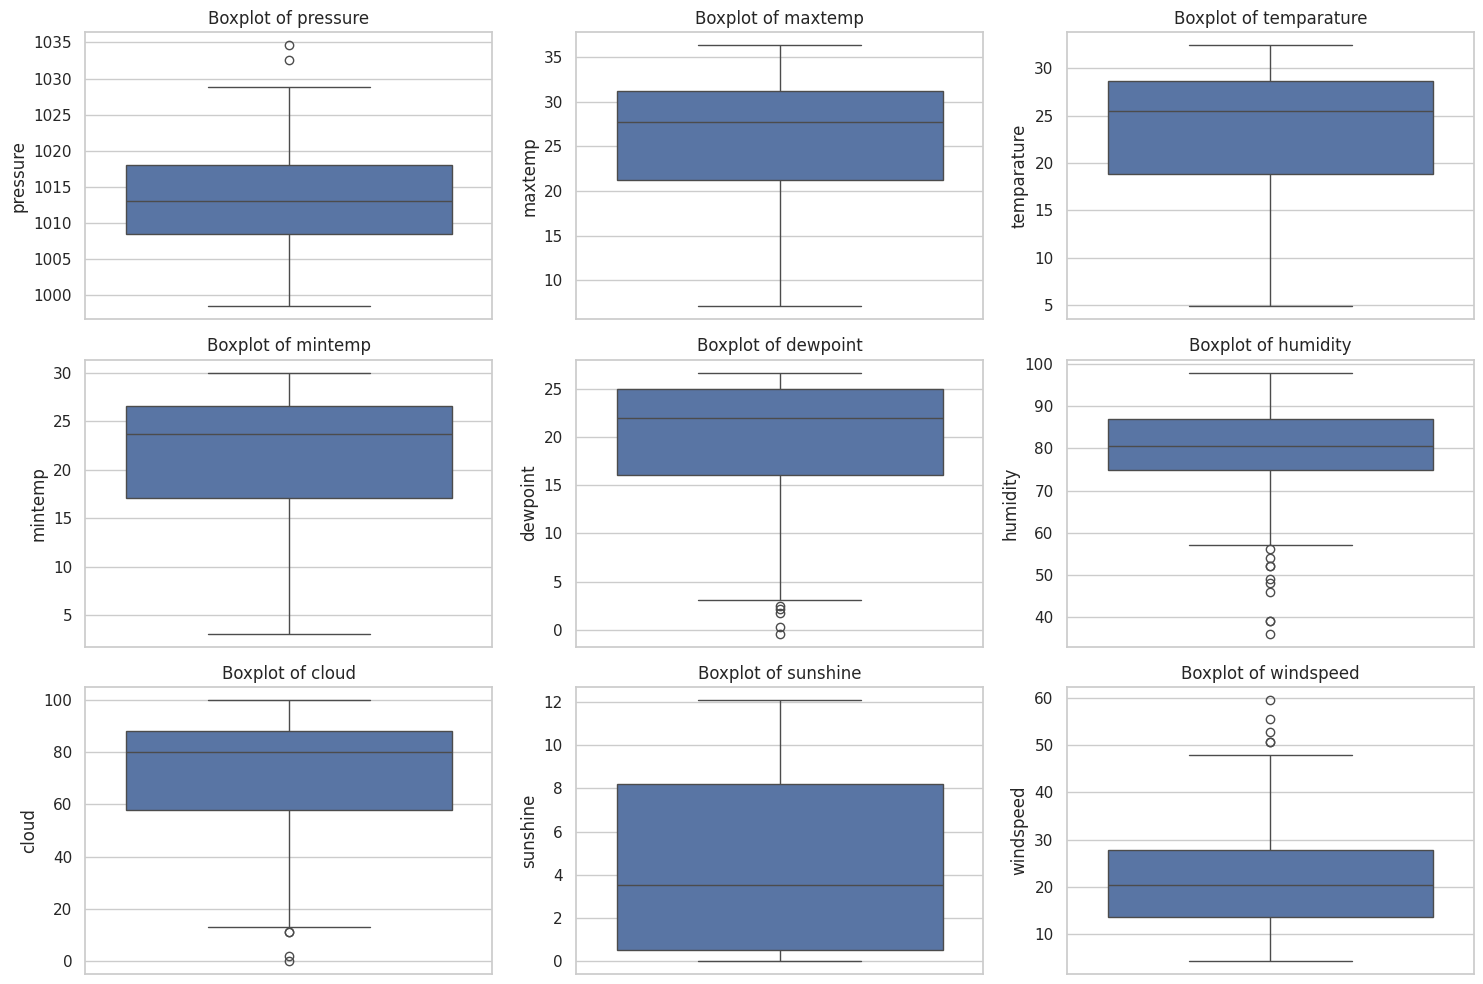

In [26]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud','sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(rainfall_data[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

Data Preprocessing

In [27]:
rainfall_data=rainfall_data.drop(columns=['maxtemp', 'temparature', 'mintemp'],axis=1)

In [28]:
rainfall_data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [29]:
# separating majority and minority class
data_maj=rainfall_data[rainfall_data['rainfall']==1]
data_min = rainfall_data[rainfall_data['rainfall']==0]

In [30]:
print(data_maj.shape)
print(data_min.shape)

(249, 8)
(117, 8)


In [31]:
# downsample the majority class to match the minority class
data_maj_downsampled=resample(data_maj,replace=False,n_samples=len(data_min),random_state=42)

In [32]:
print(data_maj_downsampled.shape)

(117, 8)


In [33]:
df_downsampled=pd.concat([data_maj_downsampled,data_min])

In [34]:
print(df_downsampled.shape)

(234, 8)


In [35]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [36]:
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [37]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [38]:
X = df_downsampled.drop(columns='rainfall',axis=1)
y = df_downsampled['rainfall']

In [39]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model Training

In [40]:
model =RandomForestClassifier(random_state=42)

param_grid_rf={
    "n_estimators":[50,100,200],
    "max_depth":[None,10,20,30],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
}

In [41]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [42]:
best_model=grid_search.best_estimator_
print("Best parameters for Random Forest",grid_search.best_params_)

Best parameters for Random Forest {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


Model Evaluation

In [43]:
cv_scores = cross_val_score(best_model,X_train,y_train,cv=5)
print("Cross validation scores: ",cv_scores)
print("mean of cv scores: ",cv_scores.mean())

Cross validation scores:  [0.71052632 0.78947368 0.83783784 0.81081081 0.91891892]
mean of cv scores:  0.8135135135135135


In [44]:
y_predict = best_model.predict(X_test)
print("Test set Accuracy: ",accuracy_score(y_test,y_predict))
print("Test set confusion matrix :\n ",confusion_matrix(y_test,y_predict))
print("classification report :\n ",classification_report(y_test,y_predict))

Test set Accuracy:  0.7446808510638298
Test set confusion matrix :
  [[16  8]
 [ 4 19]]
classification report :
                precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.70      0.83      0.76        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [45]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [46]:
input = (1017.5,15.5,85,91,0,70,37.7)
input_df = pd.DataFrame([input],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

In [47]:
prediction = best_model.predict(input_df)
print("Prediction result: ","Rainfall" if prediction[0]==1 else "No Rainfall")

Prediction result:  Rainfall


In [50]:
# saving the model
model_data = {"model":best_model,"feature_names":X.columns.tolist()}
with open("rainfall_model.pkl","wb") as file:
  pickle.dump(model_data,file)